In [1]:
#import various useful packages
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as random
%matplotlib inline

#importing dimensionality reduction packages
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import MDS
from sklearn.manifold import Isomap 
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import TSNE
# import umap

#importing clustering packages
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [2]:
#Import MNIST Data
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')
allDigitData = mnist.data

In [12]:
type(allDigitData)

numpy.ndarray

In [3]:
#Select 1000 random digits
N = 1000
idx = np.random.choice(range(np.shape(allDigitData)[0]),N)
idx

array([19780, 64102,  7434, 64431, 66852, 64187,  5176,  2071, 44546,
       57680,   699, 29244, 16960, 66844, 43752,   332, 63988, 14542,
       28222, 11924, 24257,  5809, 49420,  6052, 19629, 33828, 35383,
       14515,  9940, 27026, 24399, 65481, 44042, 12571, 59007, 10057,
       19415, 31421,  2018,  6314, 62008, 66406,  7038, 65954,  7619,
        7978, 16256,  9956, 41952, 23553, 53838, 16645, 46186, 57205,
        1470, 58135, 61590, 36840, 53318, 31757,  4980, 44975,  5464,
       42068, 16823, 51102, 57008,  9922, 66237, 42651,  8648, 51266,
       69487, 52505, 46401, 37159, 28605, 22219, 52310, 11190, 11470,
        7493,  7611, 12083, 47443, 59219, 29907, 17084,  9069,  8020,
       56799,  1961, 30318,  7047, 27317, 61083,  2712, 51741, 58320,
       59217, 47514, 51410,  4372, 30975, 26843,  2660, 48090,  3168,
       27378,  9279, 55330, 59469, 41139,  2434, 31059, 46828, 28471,
        3689, 11710, 60227, 69559, 49415,  8208, 56837,  7903, 33264,
       46792, 23166,

In [4]:
allDigitData = allDigitData.to_numpy()

In [5]:
allDigitData.shape

(70000, 784)

In [6]:
digitData = allDigitData[idx,:]
digitNames = mnist.target.astype(np.int)[idx]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


In [7]:
# @title Helper Functions (Run this code)

def plot_MNIST_reconstruction(X, X_reconstructed):
  """
  Plots 9 images in the MNIST dataset side-by-side with the reconstructed
  images.

  Args:
    X (numpy array of floats)               : Data matrix each column
                                              corresponds to a different
                                              random variable
    X_reconstructed (numpy array of floats) : Data matrix each column
                                              corresponds to a different
                                              random variable

  Returns:
    Nothing.
  """

  plt.figure()
  ax = plt.subplot(121)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.title('Data')
  plt.clim([0, 250])
  ax = plt.subplot(122)
  k = 0
  for k1 in range(3):
    for k2 in range(3):
      k = k + 1
      plt.imshow(np.reshape(np.real(X_reconstructed[k, :]), (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2 + 1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((3 * 28, 0))
  plt.ylim((3 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.clim([0, 250])
  plt.title('Reconstructed')
  plt.tight_layout()


def plot_MNIST_sample(X):
  """
  Plots 9 images in the MNIST dataset.

  Args:
     X (numpy array of floats) : Data matrix each column corresponds to a
                                 different random variable

  Returns:
    Nothing.

  """

  fig, ax = plt.subplots()
  k = 0
  for k1 in range(10):
    for k2 in range(10):
      k = k + 1
      plt.imshow(np.reshape(X[k, :], (28, 28)),
                 extent=[(k1 + 1) * 28, k1 * 28, (k2+1) * 28, k2 * 28],
                 vmin=0, vmax=255)
  plt.xlim((10 * 28, 0))
  plt.ylim((10 * 28, 0))
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim([0, 255])
  ax.set_xticks([])
  ax.set_yticks([])
  plt.show()

def plot_MNIST_weights(weights):
  """
  Visualize PCA basis vector weights for MNIST. Red = positive weights,
  blue = negative weights, white = zero weight.

  Args:
     weights (numpy array of floats) : PCA basis vector

  Returns:
     Nothing.
  """

  #fig, ax = plt.subplots()
  cmap = plt.cm.get_cmap('seismic')
  Z = np.zeros((28*4,28*6))
  k = 0
  for i in range(4):
    xstart = 0 + i*28
    xend = (i+1)*28
    for j in range(6):
      ystart = 0 + j*28
      yend = (j+1)*28
      Z[xstart:xend,ystart:yend] = np.real(np.reshape(weights[k,:], (28, 28)))
      k += 1
  #plt.imshow(np.real(np.reshape(weights[i,:], (28, 28))), cmap=cmap)
  plt.imshow(Z,cmap=cmap)
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim(-.15, .15)
  plt.colorbar()
  #ax.set_xticks([])
  #ax.set_yticks([])
  plt.show()


def plot_MNIST_weights_NMF(weights):
  """
  Visualize PCA basis vector weights for MNIST. Red = positive weights,
  blue = negative weights, white = zero weight.

  Args:
     weights (numpy array of floats) : PCA basis vector

  Returns:
     Nothing.
  """

  #fig, ax = plt.subplots()
  cmap = plt.cm.get_cmap('Greys')
  Z = np.zeros((28*4,28*6))
  k = 0
  for i in range(4):
    xstart = 0 + i*28
    xend = (i+1)*28
    for j in range(6):
      ystart = 0 + j*28
      yend = (j+1)*28
      Z[xstart:xend,ystart:yend] = np.real(np.reshape(weights[k,:], (28, 28)))
      k += 1
  #plt.imshow(np.real(np.reshape(weights[i,:], (28, 28))), cmap=cmap)
  plt.imshow(Z,cmap=cmap)
  plt.tick_params(axis='both', which='both', bottom=False, top=False,
                  labelbottom=False)
  plt.clim(0,.6*np.max(weights))
  plt.colorbar()
  #plt.colorbar(ticks=[-.15, -.1, -.05, 0, .05, .1, .15])
  #ax.set_xticks([])
  #ax.set_yticks([])
  plt.show()


def add_noise(X, frac_noisy_pixels):
  """
  Randomly corrupts a fraction of the pixels by setting them to random values.

  Args:
     X (numpy array of floats)  : Data matrix
     frac_noisy_pixels (scalar) : Fraction of noisy pixels

  Returns:
     (numpy array of floats)    : Data matrix + noise

  """

  X_noisy = np.reshape(X, (X.shape[0] * X.shape[1]))
  N_noise_ixs = int(X_noisy.shape[0] * frac_noisy_pixels)
  noise_ixs = np.random.choice(X_noisy.shape[0], size=N_noise_ixs,
                               replace=False)
  X_noisy[noise_ixs] = np.random.uniform(0, 255, noise_ixs.shape)
  X_noisy = np.reshape(X_noisy, (X.shape[0], X.shape[1]))

  return X_noisy




0.5714025946899135


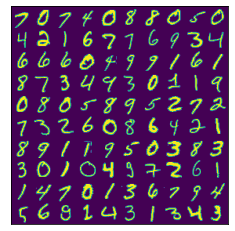

In [8]:
import random

random.seed(10)
print(random.random())

plot_MNIST_sample(allDigitData)

In [13]:
allDigitData.shape

(70000, 784)

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


Text(0.5, 1.0, 'NMF')

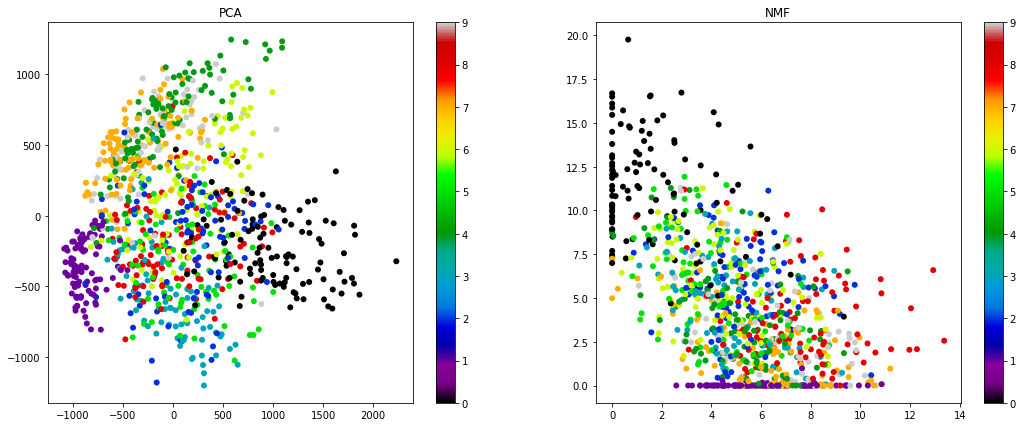

In [9]:
##PCA
pca_model = PCA() #(n_components=2)
pca_projections = pca_model.fit_transform(digitData)

##NMF
nmf_model = NMF(n_components=2)
nmf_projections = nmf_model.fit_transform(digitData)


fig = plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.scatter(pca_projections[:,0],pca_projections[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title("PCA")


plt.subplot(1,2,2)
plt.scatter(nmf_projections[:,0],nmf_projections[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title("NMF")

/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:1641: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  ConvergenceWarning,


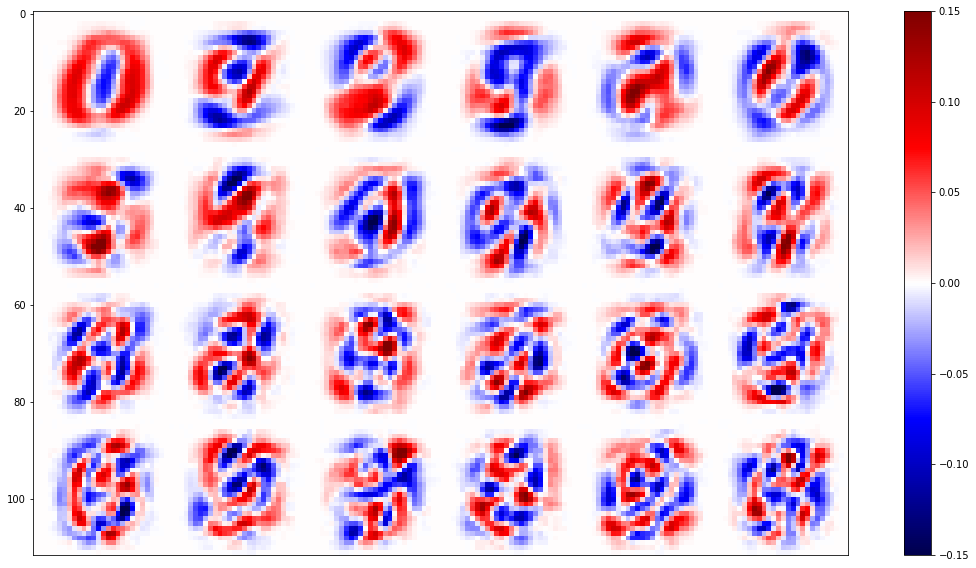

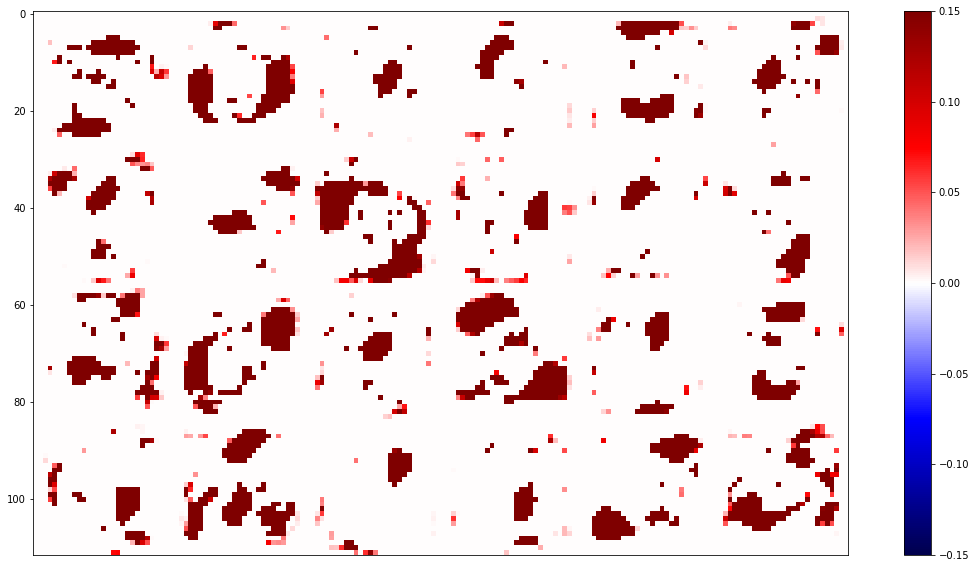

In [10]:
##PCA
pca_model = PCA()
pca_projections = pca_model.fit_transform(digitData)

##NMF
nmf_model = NMF(n_components=28)
nmf_projections = nmf_model.fit_transform(digitData)

plt.rcParams["figure.figsize"] = (20,10)
plot_MNIST_weights(pca_model.components_)
plot_MNIST_weights(nmf_model.components_)



/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default lea

Text(0.5, 1.0, 'Perpelxity=50')

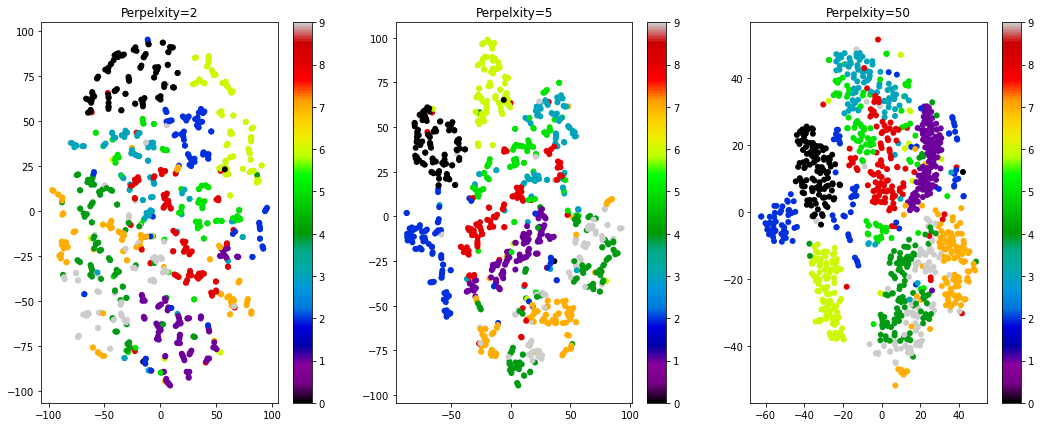

In [11]:
tsne_example1 = TSNE(n_components=2,perplexity=2,method='exact') 
Y1 = tsne_example1.fit_transform(digitData)
Y21 = tsne_example1.embedding_
fig = plt.figure(figsize=(18,7))
plt.subplot(1,3,1)
plt.scatter(Y21[:,0],Y21[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('Perpelxity=2')

tsne_example2 = TSNE(n_components=2,perplexity=5,method='exact') 
#Fits the model and returns back the low-dimensional projections
Y2 = tsne_example2.fit_transform(digitData)
Y22 = tsne_example2.embedding_

plt.subplot(1,3,2)
plt.scatter(Y22[:,0],Y22[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('Perpelxity=5')


tsne_example3 = TSNE(n_components=2,perplexity=50,method='exact') 
#Fits the model and returns back the low-dimensional projections
Y3 = tsne_example3.fit_transform(digitData)
Y23 = tsne_example3.embedding_

plt.subplot(1,3,3)
plt.scatter(Y23[:,0],Y23[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('Perpelxity=50')




# Lets try all the different methods for dim red that we attempted before in 1D, in 2D here again:

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/_nmf.py:294: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  FutureWarning,


Text(0.5, 1.0, 'PCA')

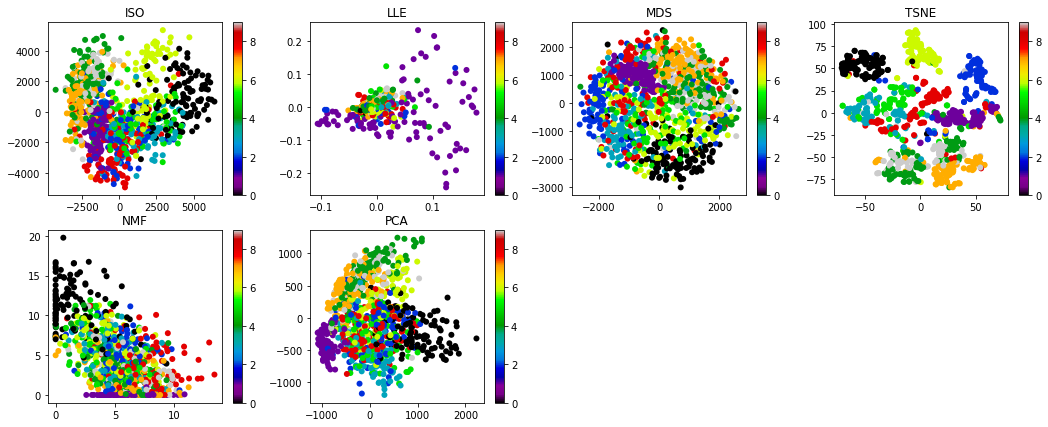

In [14]:
fig = plt.figure(figsize=(18,7))

##Isomap
plt.subplot(2,4,1)
digit_isomap = Isomap(n_components=2,n_neighbors=10) 
projections_iso = digit_isomap.fit_transform(digitData)
plt.scatter(projections_iso[:,0],projections_iso[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('ISO')

##LLE
plt.subplot(2,4,2)
digit_LLE = LocallyLinearEmbedding(n_components=2,n_neighbors=20) 
projections_lle = digit_LLE.fit_transform(digitData)
plt.scatter(projections_lle[:,0],projections_lle[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('LLE')

##MDS
plt.subplot(2,4,3)
digit_mds = MDS(n_components=2) 
projections_mds = digit_mds.fit_transform(digitData)
plt.scatter(projections_mds[:,0],projections_mds[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('MDS')


#T-SNE
plt.subplot(2,4,4)
digit_tsne = TSNE(n_components=2,perplexity=10,method='exact') 
tsne_projections = digit_tsne.fit_transform(digitData)
plt.scatter(tsne_projections[:,0],tsne_projections[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('TSNE')

##NMF
plt.subplot(2,4,5)
digit_nmf = NMF(n_components=2) 
projections_nmf = digit_nmf.fit_transform(digitData)
plt.scatter(projections_nmf[:,0],projections_nmf[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('NMF')

##PCA
plt.subplot(2,4,6)
digit_pca = PCA() 
projections_pca = digit_pca.fit_transform(digitData)
plt.scatter(projections_pca[:,0],projections_pca[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
plt.title('PCA')

# ##Umap
# digit_umap = umap.UMAP(n_components=2,n_neighbors=40,min_dist=.05) 
# projections_umap = digit_umap.fit_transform(digitData)
# plt.scatter(projections_umap[:,0],projections_umap[:,1],c=digitNames,edgecolor="none",cmap=plt.cm.get_cmap('nipy_spectral'));plt.colorbar()
# plt.title('UMAP')
# plt.subplot(2,4,7)